As per usual, we need to generate random numbers. We'll use python's `random` module, which fits the bill perfectly. We also use `tqdm` to see a progress bar in some places below.

In [1]:
import random
from tqdm.auto import tqdm, trange
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let's now define a bunch of functions to streamline to simulation

In [2]:
def roll():
    """
    Return a random number between 1 and 6 with a uniform distribution
    """

    return random.randrange(1, 7)

def turn():
    """
    Return a generator that contains the cumulative points achieved in a turn.
    The turn goes all the way to the first time one rolls a 1, in which case the
    total of the run will be reset to 0, and the turn ends
    """

    total = 0

    while True:
        r = roll()

        if r == 1:
            # The end of the turn. We score a total of 0
            yield 0
            return
        else:
            # Our running total is udpated with the value we rolled
            total += r
            yield total

def strat_rolls(n_rolls):
    """
    Return the amount scored with a strategy where the player rolls until
    getting a one, or until a given number of rolls is done
    """

    t = list(turn())

    if n_rolls < len(t):
        return t[n_rolls]
    else:
        return 0


def strat_points(target):
    """
    Return the amount scored with a strategy where the player rolls while
    the running total is strictly below a given target
    """

    t = turn()

    for value in t:
        if value >= target:
            return value

    return 0

Let's see what these strategies look like.

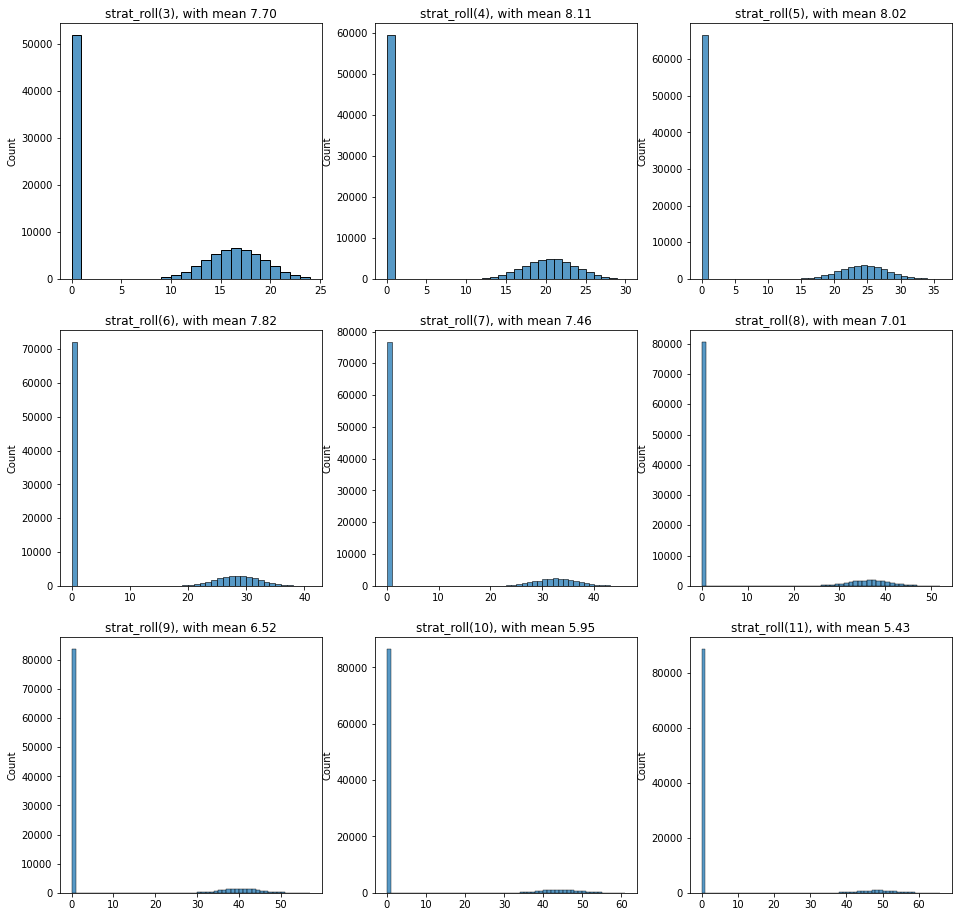

In [3]:
N = 100000

fig, axs = plt.subplots(3, 3, figsize=(16, 16))

for n_rolls, ax in zip(trange(3, 12), axs.flatten()):
    sample = [strat_rolls(n_rolls) for _ in trange(N, leave=False)]
    
    mean = np.mean(sample)
    
    sns.histplot(sample, bins=list(range(max(sample) + 1)), ax=ax)
    
    ax.set_title(f'strat_roll({n_rolls}), with mean {mean:.2f}')

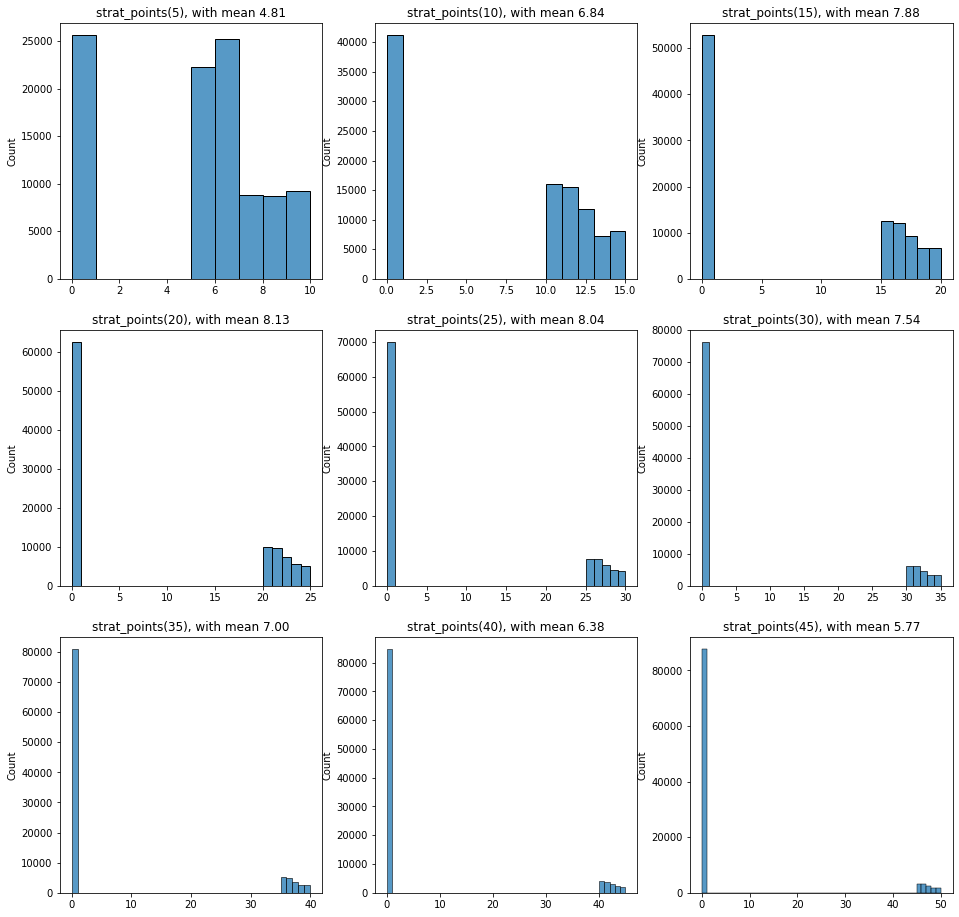

In [4]:
N = 100000

fig, axs = plt.subplots(3, 3, figsize=(16, 16))

for target, ax in zip(trange(5, 50, 5), axs.flatten()):
    sample = [strat_points(target) for _ in trange(N, leave=False)]
    
    mean = np.mean(sample)
    
    sns.histplot(sample, bins=list(range(max(sample) + 1)), ax=ax)
    
    ax.set_title(f'strat_points({target}), with mean {mean:.2f}')